# Sistemas Inteligentes

## Laboratório 4 - Clusterização

Algoritmos de Clusterização 
- k-means
- Affinity Propagation

Aplicação em compressão de imagens



## Importação e preparação dos dados

In [ ]:
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [ ]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

Carregue a base de dados IRIS, então efetue uma redução de dimensionalidade utilizando PCA com 2 componentes. Por fim, faça um Holdout dos dados para separar dados de treino e teste; utilize 20% para teste e faça o embaralhamento dos dados nesse processo.

In [ ]:
# Carregando a base de dados #

dados = load_iris()

# Separando e fazendo o embaralhamento #

X = PCA(n_components = 2).fit_transform(dados.data)
y = dados.target
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, shuffle = True)

## Clusterização 

Calcule os centróides de cada grupo (considere 3 grupos) para os dados de treino.

In [ ]:
c0=[]; c1=[]; c2=[]
for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        c0.append(X_train[i])
    elif y_train[i] == 1:
        c1.append(X_train[i])
    else:
        c2.append(X_train[i])
        
c0=np.array(c0)
c1=np.array(c1)
c2=np.array(c2)
        
c0_cm = np.array([np.mean(c0[:,0]), np.mean(c0[:,1])])
c1_cm = np.array([np.mean(c1[:,0]), np.mean(c1[:,1])])
c2_cm = np.array([np.mean(c2[:,0]), np.mean(c2[:,1])])

cm = np.vstack((c0_cm, c1_cm, c2_cm))

Exiba o gráfico de dispersão para os dados de treinamento com seus respectivos centróides. Lembre-se de utilizar os eixos da transformação do PCA e, também, de utilizar os valores dos alvos (y) como base para definir de qual cor será cada amostra representada no gráfico.

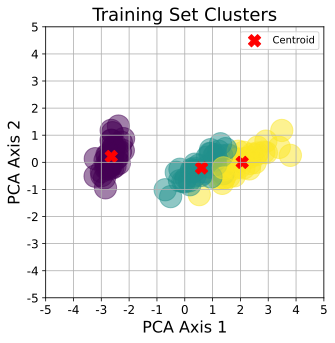

In [ ]:
plt.figure()
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.scatter(x=cm[:,0], y=cm[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Algoritmo K-MEANS

Agora crie um objeto de agrupamento com a função KMeans; utilize 3 grupos e já faça o ajuste (fit) com base nos dados de entrada de treinamento. Ainda na mesma célula, faça a predição com base nos dados de entrada de teste.

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(X_train)
y_pred = kmeans.predict(X_test)

Exiba os centróides de cada grupo (dica: há um objeto da classe kmeans para isso)

In [ ]:
kmeans.cluster_centers_

array([[ 0.72522713, -0.29684316],
       [-2.64243844,  0.21456846],
       [ 2.31249058,  0.21072972]])

Mostre a inércia do modelo (dica: há um objeto da classe kmeans para isso)

In [ ]:
kmeans.inertia_

50.200372511215164

Tal como havia sido feito para os dados de treinamento, exiba o gráfico de dispersão, mas agora utilizando amostras de teste e utilizando as predições do kmeans para determinar as cores de cada amostra.

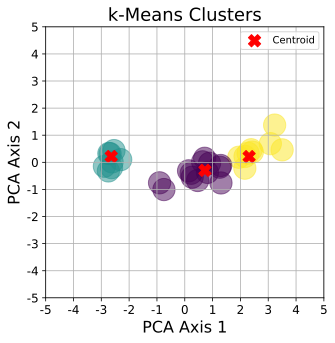

In [ ]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('k-Means Clusters')
plt.grid(True)

plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Algoritmo de Propagação de Afinidade

Gere um objeto de agrupamento com AffinityPropagation e faça o ajuste com base nas entradas de treinamento.

In [ ]:
APA = AffinityPropagation(preference = -40).fit(X_train)

Mostre os centróides dos grupos.

In [ ]:
APA.cluster_centers_

array([[ 0.66028376, -0.35296967],
       [-2.62614497,  0.16338496],
       [ 2.31415471,  0.18365128]])

Mostre os índices dos grupos.

In [ ]:
APA.cluster_centers_indices_

array([ 5, 37, 61])

Faça a predição com base nos dados de entrada de teste e ostre o resultado da predição.

In [ ]:
y_pred_apa = APA.predict(X_test)
y_pred_apa

array([2, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 2])

Novamente, exiba o gráfico de espalhamento das amostras de entrada, mas agora colorindo-as com base nas predições (dos grupos a que pertencem) feitas pelo algoritmo de Affinity Propagation.

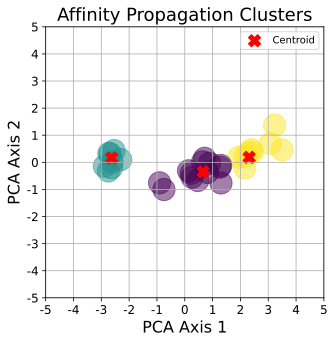

In [ ]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred_apa, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Affinity Propagation Clusters')
plt.grid(True)

plt.scatter(x=APA.cluster_centers_[:,0], y=APA.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Aplicação - Compressão de Imagem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Defina a variável n_cores com a quantidade de cores desejada para a figura final, então importe uma figura (baixada do TIDIA), atribuindo-a à variável imagem. Depois, converta a figura para um array de tipo float64 com valores de 0 a 1. Por fim, exiba o formato da imagem.

In [ ]:
# Importando bibliotecas para carregar a imagem #
import cv2
from google.colab.patches import cv2_imshow
#imagem = cv2.imread('fish.jpg')
imagem = plt.imread('fish.jpg')
# Definindo a variável n_cores e convertendo a figura para um array #

n_cores = 64
imagem = np.array(imagem, dtype = np.float64) / 255
imagem.shape


(1786, 2176, 3)

Exiba a imagem

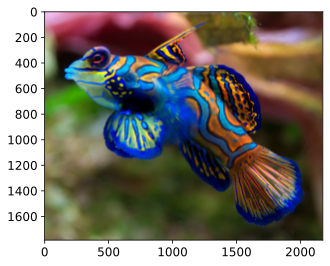

In [ ]:
plt.imshow(imagem)

Modifique o formato da matriz correspondente à imagem para que a primeira dimensão refira-se à posição do pixel e a segunda dimensão refira-se à tríade de valores das camadas RGB.

In [ ]:
w,h, d = imagem.shape

imagem_array = imagem.reshape(w * h, d)
imagem_array.shape

(3886336, 3)

Atribua à variável X uma versão "embaralhada" (shuffle) do array da imagem obtido após o reshape, mas selecione apenas os 1000 primeiros valores. Então, crie o objeto agrupador utilizando a função KMeans com o número de grupos igual ao número de cores. Por fim, efetue o ajuste com a função fit com base em X.

In [ ]:
X = shuffle(imagem_array, random_state = 0)[:1000]
kmeans = KMeans(n_clusters = n_cores , random_state = 0).fit(X)

Realize uma predição com o agrupador kmeans, baseando-se no array da imagem e atribua o resultado à variável grupos.

In [ ]:
grupos = kmeans.predict(imagem_array)

Agora, atribua à variavel codebook_random uma nova versão embaralhada do array da imagem, mas selecione apenas a quantidade de valores que corresponda ao número de cores definido inicialmente. Ainda nesta célula, utilize a função pairwise_distances_argmin para selecionar os grupos aleatórios que minimizam as distâncias. Dica: para esta última função, utilize como argumentos: codebook_random, imagem_array e axis=0, nesta ordem.

In [ ]:
codebook_random = shuffle(imagem_array, random_state = 99)[:n_cores]
grupo_novo = pairwise_distances_argmin(codebook_random, imagem_array, axis = 0, metric = 'euclidean')

In [ ]:
# Recria a imagem comprimida com base no Code Book e nos índices
def recria_imagem(codebook, grupos, w, h):
    d = codebook.shape[1]
    imagem = np.zeros((w, h, d))
    grupo_idx = 0
    for i in range(w):
        for j in range(h):
            imagem[i][j] = codebook[grupos[grupo_idx]]
            grupo_idx += 1
    return imagem

Utilizando uma célula para cada caso, exiba a imagem original, a imagem quantizada por K-Means e a imagem quantizada por distâncias aleatórias mínimas.

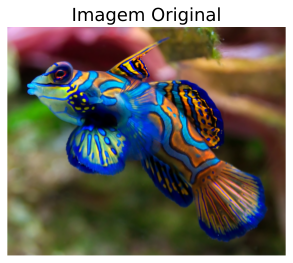

In [ ]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Imagem Original')
plt.imshow(imagem)

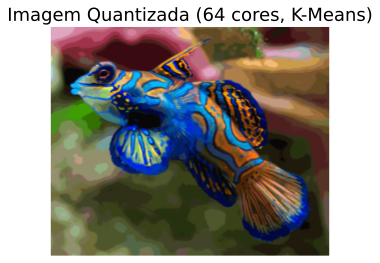

In [ ]:
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Imagem Quantizada (%d cores, K-Means)' % n_cores)
plt.imshow(recria_imagem(kmeans.cluster_centers_, grupos, w, h))

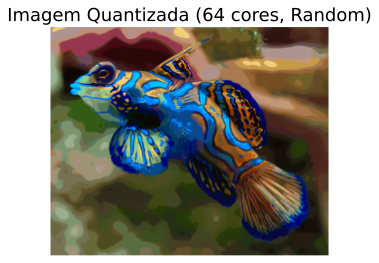

In [ ]:
plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Imagem Quantizada (%d cores, Random)' % n_cores)
plt.imshow(recria_imagem(codebook_random, grupos_random, w, h))